In [75]:
import numpy as np
#from scipy import stats
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#import japanize_matplotlib

In [76]:
df = pd.read_csv('2021-5-14.csv')
df

,Time,Temperature,Humidity,CO2,Noise,Pressure
0,0:04:02,23.6,62,2693,32,1014.9
1,0:09:05,23.6,62,2710,32,1014.9
2,0:14:08,23.7,62,2697,32,1014.9
3,0:19:11,23.6,62,2700,32,1014.9
4,0:24:14,23.6,62,2725,32,1014.9
...,...,...,...,...,...,...
242,20:26:08,25.7,57,2384,32,1014.9
243,20:31:11,25.7,57,2384,32,1014.9
244,20:36:14,25.6,57,2415,32,1014.9
245,20:41:17,25.6,57,2371,32,1014.9


In [77]:
print(df['CO2'].corr(df['Temperature'])) 
print(df['CO2'].corr(df['Humidity']))

-0.6999906186579758
0.9059224837868579


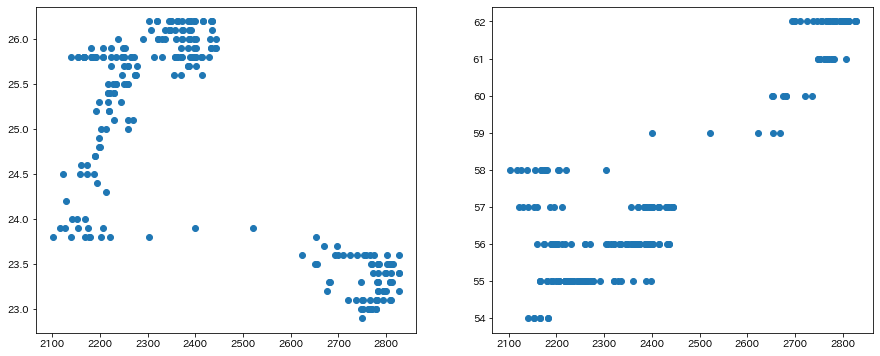

In [78]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.scatter(df['CO2'], df['Temperature'])
plt.subplot(1,2,2)
plt.scatter(df['CO2'], df['Humidity'])

In [96]:
X = df.drop(columns=['Time','CO2','Noise','Pressure'])
y = df['CO2']
#print(y)
#X = preprocessing.StandardScaler().fit_transform(X)
X = preprocessing.MinMaxScaler().fit_transform(X)

from sklearn.model_selection import train_test_split 
# 訓練データ・テストデータへ6:4の比でランダムに分3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [97]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=5)
rf.fit(X_train, y_train)

#正答率
print("正答率(学習) = ", rf.score(X_train,y_train))
print("正答率(テスト) = ", rf.score(X_test,y_test))

正答率(学習) =  0.9844788349716574
正答率(テスト) =  0.9686189747334814


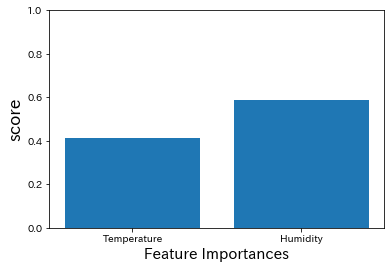

In [101]:
plt.figure(figsize=(6, 4))
plt.ylim([0, 1])
plt.xlabel("Feature Importances",fontsize = 15)
plt.ylabel("score",fontsize = 17)
y = rf.feature_importances_  
x = np.arange(len(y))
label = ['Temperature','Humidity']
plt.bar(x, y, tick_label=label, align="center")
plt.show()